In [152]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

import os.path as osp
import numpy as np
from PIL import Image
import mmcv
import matplotlib.pyplot as plt
import random

1.10.0 True
0.21.1


### view sample dataset in FSD dataset

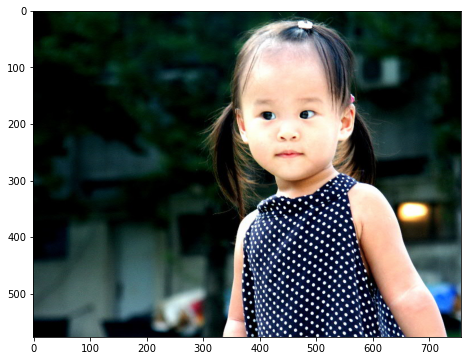

In [153]:
img = np.array(Image.open('../dataset/fsd4000/Original/im02000.jpg'))
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.show()

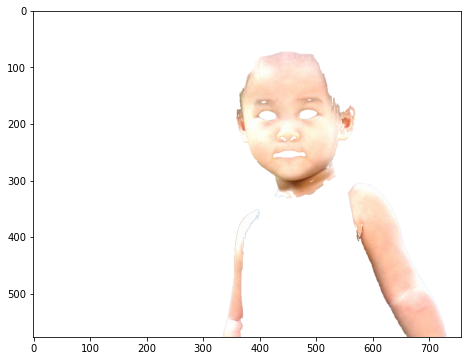

In [154]:
img = np.array(Image.open('../dataset/fsd4000/Skin/im02000.bmp'))
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.show()

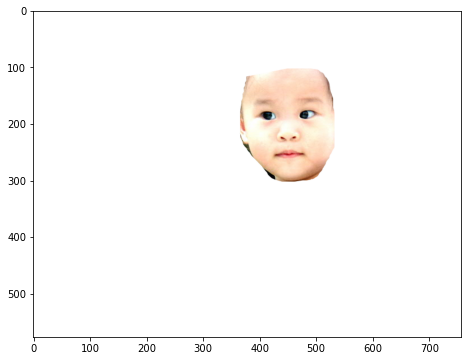

In [155]:
img = np.array(Image.open('../dataset/fsd4000/Face/im02000.bmp'))
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.show()

- Datasets in MMSegmentation require image and semantic segmentation maps to be placed in folders with the same prefix.

### convert Skin groundtruth to segmentation map
- convert bmp image to segmentation map based on RGB three channels
- two classes
- face or non-face

In [124]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = '../dataset/fsd4000'
img_dir = 'Original'
ann_dir = 'Skin'

# define class and plaette for better visualization
classes = ('skin','bg')
palette = [[129, 127, 38],[249, 220, 212]]

# find white pixels, then convert three channels to one channel image to create segmentation map
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.bmp'):
    try:
        img = np.array(Image.open(osp.join(data_root, ann_dir, file))).astype(np.uint8)
        img = np.where(img<255,0,1).astype(np.uint8)
        img = np.sum(img,2)
        img = np.where(img==3,1,0).astype(np.uint8)
        seg_img = Image.fromarray(img).convert('P')
        seg_img.putpalette(np.array(palette, dtype=np.uint8))
        seg_img.save(osp.join(data_root, ann_dir, file.replace('.bmp','.png')))
    except:
        print(osp.join(data_root, ann_dir, file))
        pass

../dataset/fsd4000/Skin/im03610.bmp


### convert Face groundtruth to segmentation map
- convert bmp image to segmentation map based on RGB three channels
- two classes
- skin or non-skin
- wrong file - '/Skin/im03610.bmp'

In [156]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = '../dataset/fsd4000'
img_dir = 'Original'
ann_dir = 'Face'

# define class and plaette for better visualization
classes = ('face','bg')
palette = [[129, 127, 38],[249, 220, 212]]

# find white pixels, then convert three channels to one channel image to create segmentation map
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.bmp'):
    try:
        img = np.array(Image.open(osp.join(data_root, ann_dir, file))).astype(np.uint8)
        img = np.where(img<255,0,1).astype(np.uint8)
        img = np.sum(img,2)
        img = np.where(img==3,1,0).astype(np.uint8)
        seg_img = Image.fromarray(img).convert('P')
        seg_img.putpalette(np.array(palette, dtype=np.uint8))
        seg_img.save(osp.join(data_root, ann_dir, file.replace('.bmp','.png')))
    except:
        print(osp.join(data_root, ann_dir, file))
        pass

### split training/testing/validation

In [157]:
# split train/val set randomly
split_dir = 'face_splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.png')]
random.shuffle(filename_list)
# randomly select 8:2 as train:val set
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
    train_length = int(len(filename_list)*4/5)
    f.writelines(line + '\n' for line in filename_list[:train_length])
    
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
    f.writelines(line + '\n' for line in filename_list[train_length:])

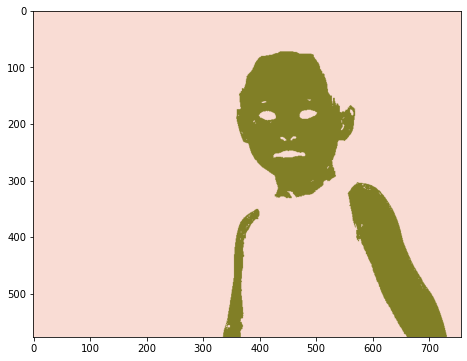

In [136]:
img = mmcv.imread('../dataset/fsd4000/Skin/im02000.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()